# Préambule: régression linéaire, régression ridge et LASSO

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Lecture des données

In [2]:
# Fonction pour la lecture des données USPS\n",
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    return np.array(data)

In [3]:
# Lecture des données train et test
data_train = load_usps("USPS_train.txt")
data_test = load_usps("USPS_test.txt")

### Apprendre une classe contre l'ensemble des autres classes

In [4]:
def split_1_vs_all(data_train, data_test, num):
    
    """   
    Diviser les données train (test) en données en 2 ensembles: le premier correspond à la classe 'num'\n",
    le deuxième aux données des autres classes.\n",
    "    data_train: données d'apprentissage\n",
    "    data_test: données d'évaluation\n",
    "    num: le label de la classe à apprendre\n",
    """
    dtrain_num = list()
    dtrain_other = list()
    dtest_num = list()
    dtest_other = list()
    
    for i in range(len(data_train)):
        if int(data_train[i][0]) == num:
            dtrain_num.append(np.concatenate((np.asarray([1]), data_train[i,1:]), axis=None))
    "        else:\n",
    "            dtrain_other.append(np.concatenate((np.asarray([-1]), data_train[i,1:]), axis=None))\n",
    "            \n",
    "    for i in range(len(data_test)):\n",
    "        if int(data_test[i][0]) == num:\n",
    "            dtest_num.append(np.concatenate((np.asarray([1]), data_test[i,1:]), axis=None))\n",
    "        else:\n",
    "            dtest_other.append(np.concatenate((np.asarray([-1]), data_test[i,1:]), axis=None))\n",
    "            \n",
    "    dtrain_num = np.asarray(dtrain_num)\n",
    "    dtest_num = np.asarray(dtest_num)\n",
    "    dtrain_other = np.asarray(dtrain_other)[:len(dtrain_num)]\n",
    "    dtest_num = np.asarray(dtest_other)[:len(dtest_num)]\n",
    "    np.random.shuffle(dtrain_other)\n",
    "    np.random.shuffle(dtest_other)\n",
    "    \n",
    "    dtr = np.concatenate((dtrain_num, dtrain_other))\n",
    "    dts = np.concatenate((dtest_num, dtest_other))\n",
    "    np.random.shuffle(dtr)\n",
    "    np.random.shuffle(dts)\n",
    "    \n",
    "    print(dtr.shape)\n",
    "    print(dts.shape)\n",
    "    \n",
    "    return dtr[:,1:], dtr[:,0].astype(int), dts[:,1:], dts[:,0].astype(int)"

In [5]:
# Exemple de découpage sur le nombre 7 en utilisant la fonction split_1_vs_all\n",
    "Xtrain, Ytrain, Xtest, Ytest = split_1_vs_all(data_train, data_test, 6)

IndentationError: unexpected indent (<ipython-input-5-374a04372fdf>, line 2)

In [ ]:
# Protocole expérimentale\n",
    "\n",
    "alpha_ = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9]\n",
    "LR_scores = list()\n",
    "LR_coeff = list()\n",
    "Ridge_scores = list()\n",
    "Ridge_coeff = list()\n",
    "Lasso_scores = list()\n",
    "Lasso_coeff = list()\n",
    "\n",
    "for i in range(10):\n",
    "    \n",
    "    Xtrain, Ytrain, Xtest, Ytest = split_1_vs_all(data_train, data_test, i)\n",
    "    \n",
    "    linearRegression = LinearRegression()\n",
    "    linearRegression.fit(Xtrain, Ytrain)\n",
    "   \n",
    "    LR_scores.append(linearRegression.score(Xtest, Ytest))\n",
    "    LR_coeff.append(len(np.where(linearRegression.coef_ != 0)[0]))\n",
    "    \n",
    "    scoresR = list()\n",
    "    coeffR = list()\n",
    "    for j in range(len(alpha_)):\n",
    "        ridge = Ridge(alpha = alpha_[j])\n",
    "        ridge.fit(Xtrain, Ytrain)\n",
    "        \n",
    "        scoresR.append(ridge.score(Xtest, Ytest))\n",
    "        coeffR.append(len(np.where(ridge.coef_ != 0)[0]))\n",
    "        \n",
    "    Ridge_scores.append(scoresR)\n",
    "    Ridge_coeff.append(coeffR)\n",
    "    \n",
    "    scoresL = list()\n",
    "    coeffL = list()\n",
    "    for j in range(len(alpha_)):\n",
    "        lasso = Lasso(alpha = alpha_[j])\n",
    "        lasso.fit(Xtrain, Ytrain)\n",
    "        \n",
    "        scoresL.append(lasso.score(Xtest, Ytest))\n",
    "        coeffL.append(len(np.where(lasso.coef_ != 0)[0]))\n",
    "        \n",
    "    Lasso_scores.append(scoresL)\n",
    "    Lasso_coeff.append(coeffL)"

### Apprendre 2 classes différentes

In [6]:
def one_vs_one(data_train, data_test, class1, class2):
    dtrain_class1 = list()
    dtrain_class2 = list()
    dtest_class1 = list()
    dtest_class2 = list()
    
    for i in range(len(data_train)):
        if int(data_train[i][0]) == class1:
            dtrain_class1.append(np.concatenate((np.asarray([1]), data_train[i,1:]), axis=None))
        if int(data_train[i][0]) == class2:
            dtrain_class2.append(np.concatenate((np.asarray([-1]), data_train[i,1:]), axis=None))
            
    for i in range(len(data_test)):
        if int(data_test[i][0]) == class1:
            dtest_class1.append(np.concatenate((np.asarray([1]), data_test[i,1:]), axis=None))
        if int(data_test[i][0]) == class2:
            dtest_class2.append(np.concatenate((np.asarray([-1]), data_test[i,1:]), axis=None))
            
    dtrain_class1 = np.asarray(dtrain_class1)
    dtest_class1 = np.asarray(dtest_class1)
    dtrain_class2 = np.asarray(dtrain_class2)
    dtest_class2 = np.asarray(dtest_class2)
    
    dtr = np.concatenate((dtrain_class1, dtrain_class2))
    dts = np.concatenate((dtest_class1, dtest_class2))
    np.random.shuffle(dtr)
    np.random.shuffle(dts)
    
    return dtr[:,1:], dtr[:,0].astype(int), dts[:,1:], dts[:,0].astype(int)

In [7]:
# Lecture des données train et test
data_train = load_usps("USPS_train.txt")
data_test = load_usps("USPS_test.txt")

In [8]:
dtrainX, dtrainY, dtestX , dtestY = one_vs_one(data_train, data_test, 4, 6)

### Régression Linéaire

In [9]:
linearRegression = LinearRegression()
# Apprentissage du classifier sur les données train
linearRegression.fit(dtrainX, dtrainY)
# Prédiction sur les données train et test\n",
prediction_train = linearRegression.predict(dtrainX)
prediction_test = linearRegression.predict(dtestX)

In [10]:
# Évaluation du classifier
mse_train = mean_squared_error(dtrainY, prediction_train)
mse_test = mean_squared_error(dtestY, prediction_test)
print("MSE du train : ", mse_train)
print("MSE du test : ", mse_test)
print("Score en train : ", r2_score(dtrainY, prediction_train))
print("Score en test : ", r2_score(dtestY, prediction_test))
print("Le nombre de coefficients non nuls : ", len(np.where(linearRegression.coef_ != 0)[0]))

MSE du train :  0.06689851538100278
MSE du test :  0.26936222076788136
Score en train :  0.9330959216927053
Score en test :  0.728855235124096
Le nombre de coefficients non nuls :  256


On constate que le coût MSE est plus faible en train qu'en test.
De même pour le bon score de classification qui est plus faible en train qu'en test.

### Protocole expérimental

In [11]:
alpha_ = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9]

LR_scores = list()
LR_coeff = list()
Ridge_scores = list()
Ridge_coeff = list()
Lasso_scores = list()
Lasso_coeff = list()
    
for i in range(10):
    Xtrain, Ytrain, Xtest, Ytest = one_vs_one(data_train, data_test, 4, 6)
    
    linearRegression = LinearRegression()
    linearRegression.fit(Xtrain, Ytrain)
    
    LR_scores.append(linearRegression.score(Xtest, Ytest))
    LR_coeff.append(len(np.where(linearRegression.coef_ != 0)[0]))
    
    scoresR = list()
    coeffR = list()
    for j in range(len(alpha_)):
        ridge = Ridge(alpha = alpha_[j])
        ridge.fit(Xtrain, Ytrain)
        
        scoresR.append(ridge.score(Xtest, Ytest))
        coeffR.append(len(np.where(ridge.coef_ != 0)[0]))
    
    Ridge_scores.append(scoresR)
    Ridge_coeff.append(coeffR)
    
    scoresL = list()
    coeffL = list()
    for j in range(len(alpha_)):
        lasso = Lasso(alpha = alpha_[j], tol=0.1)
        lasso.fit(Xtrain, Ytrain)
        
        scoresL.append(lasso.score(Xtest, Ytest))
        coeffL.append(len(np.where(lasso.coef_ != 0)[0]))
    
    Lasso_scores.append(scoresL)
    Lasso_coeff.append(coeffL)

In [12]:
mean_scores_ridge = list(map(lambda x : np.mean(x), scoresR))
mean_coeff_ridge = list(map(lambda x : np.mean(x), coeffR))
mean_scores_lasso = list(map(lambda x : np.mean(x), scoresL))
mean_coeff_lasso = list(map(lambda x : np.mean(x), coeffL))

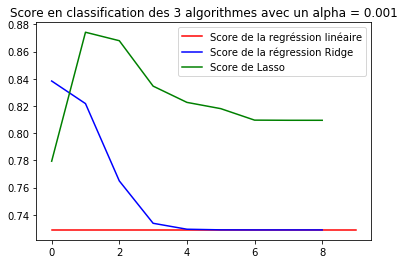

In [13]:
# Comparaison des scores des 3 algorithmes sur 10 itérations
plt.plot(range(10), LR_scores, color='red', label='Score de la regréssion linéaire')
plt.plot(range(9), mean_scores_ridge, color='blue', label='Score de la régression Ridge')
plt.plot(range(9), mean_scores_lasso, color='green', label='Score de Lasso')
plt.title("Score en classification des 3 algorithmes avec un alpha = 0.001")
plt.legend()
plt.show()

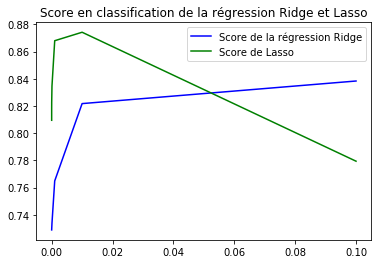

In [14]:
# Comparaison entre les scores de Ridge et Lasso de la 3ème itération pour différents alpha
plt.plot(alpha_, Ridge_scores[2], color='blue', label='Score de la régression Ridge')
plt.plot(alpha_, Lasso_scores[2], color='green', label='Score de Lasso')
plt.title("Score en classification de la régression Ridge et Lasso")
plt.legend()
plt.show()

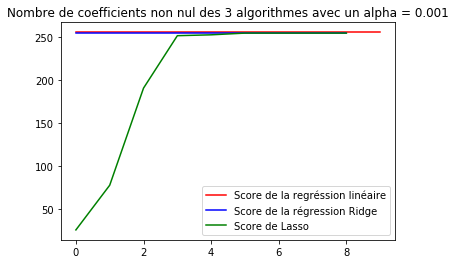

In [15]:
# Comparaison du nombre de coefficients non nuls des 3 algorithmes sur 10 itérations
plt.plot(range(10), LR_coeff, color='red', label='Score de la regréssion linéaire')
plt.plot(range(9), mean_coeff_ridge, color='blue', label='Score de la régression Ridge')
plt.plot(range(9), mean_coeff_lasso, color='green', label='Score de Lasso')
plt.title("Nombre de coefficients non nul des 3 algorithmes avec un alpha = 0.001")
plt.legend()
plt.show()

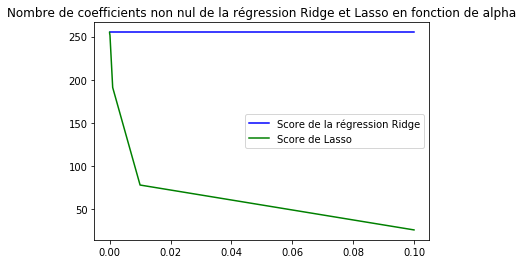

In [16]:
# Comparaison du nombre de coeffs non nuls de Ridge et Lasso de la 3ème itération pour différents alpha
plt.plot(alpha_, Ridge_coeff[2], color='blue', label='Score de la régression Ridge')
plt.plot(alpha_, Lasso_coeff[2], color='green', label='Score de Lasso')
plt.title("Nombre de coefficients non nul de la régression Ridge et Lasso en fonction de alpha")
plt.legend()
plt.show()

#  LASSO et Inpainting

## Outils pour la manipulation d'images et des patchs

In [17]:
def read_im(fn):
    img = plt.imread(fn)/255
    img = colors.rgb_to_hsv(img)
    return img.astype(np.float32)

In [18]:
def show_im(array_im):
    img = np.copy(array_im)
    for i in range(len(array_im)):
        for j in range(len(array_im[i])):
            if((array_im[i][j] == [-100, -100, -100]).all()):
                img[i][j] = [0, 0, 0]  
            else:
                img[i][j] = colors.hsv_to_rgb(array_im[i][j])
    plt.imshow(img)
    plt.show()

In [19]:
def get_patch(i, j, h, im):
    if i-h < 0 or j-h < 0 or i+h >= im.shape[0] or j+h >= im.shape[1]:
        return None
    return im[i-h:i+h,j-h:j+h,:]

In [20]:
def vec_to_patch(vec):
    return vec.reshape((-1,-1,3))

In [21]:
def patch_to_vec(patch):
    return patch.reshape((-1,3))

In [22]:
def noise(img, prc):
    img = np.copy(img)
    shape = img.shape 
    img = img.reshape((-1,3))
    n = img.shape[0]
    idxs = np.random.randint(0,high = n,size = int(n*prc))
    for i in idxs:
        img[i] = np.array([-100, -100, -100])
    img = img.reshape((shape[0], shape[1], 3))
    return img

In [23]:
def delete_rect(img, i, j, height, width):
    img = np.copy(img)
    for a in range(i, i+width):
        for b in range(j, j+height):
            img[a,b] = np.array([-100, -100, -100])
    return img

In [24]:
def get_all_patch_missing_value(im, h, step=3):
    tab = []
    for i in range(h, im.shape[0]-h, step):
        for j in range(h, im.shape[1]-1, step):
            patch = get_patch(i, j, h, im)
            if patch is None : continue
            if (patch.reshape((-1,3)) == np.array([-100, -100, -100])).all(1).any():
                    tab.append(patch)
    return tab

In [25]:
def get_dic(im, h, step=3):
    dic = {}
    for i in range(h, im.shape[0]-h, step):
        dic[i] = {}
        for j in range(h, im.shape[1]-1, step):
            patch = get_patch(i,j,h,im)
            if patch is None : continue
            if not (patch.reshape((-1,3)) == np.array([-100, -100, -100])).all(1).any():
                dic[i][j] = patch
    return dic

#### Test des fonctions

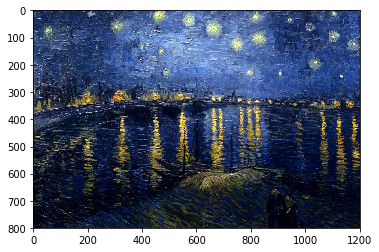

In [26]:
img = read_im("nuit_etoilee.jpg")
show_im(img)

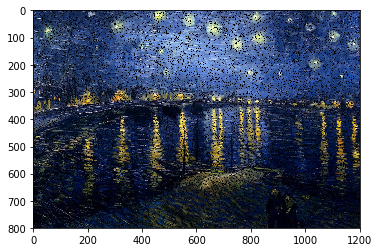

In [202]:
img_noise = noise(img, 0.1)
show_im(img_noise)

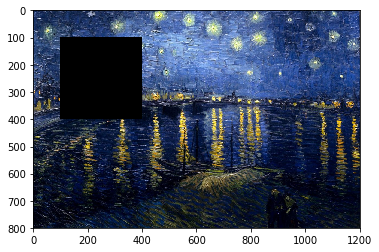

In [203]:
img_rect_manquant = delete_rect(img,100,100,300,300)
show_im(img_rect_manquant)

## Fonction d'approximation d'un patch

In [116]:
def approximation(patch, dic, alpha_):
    
    vect_patch = patch_to_vec(patch)
    vect_patch_ = list()
    for i in range(vect_patch.shape[0]):
        #if not((vect_patch[i] == [-100, -100, -100]).all()):
        for j in range(3):
            vect_patch_.append(vect_patch[i][j])
    vect_patch = np.asarray(vect_patch_)
    
    #print(vect_patch.shape)
    
    dic_set = []
    for k1 in dic.keys():
        for k2 in dic[k1].keys():
            p = list()
            for i in range(patch.shape[0]):
                for j in range(patch.shape[1]):
                    for k in range(3):
                        p.append(dic[k1][k2][i][j][k])
            dic_set.append(p)
                        
    dic_set = np.asarray(dic_set).T
    
    #print(dic_set.shape)
            
            
    lasso = Lasso(alpha=alpha_, tol=0.1)
    lasso.fit(dic_set, vect_patch)
    prediction = lasso.predict(dic_set)
    
    w = lasso.coef_
    # Calcul du 2ème terme de la pénalisation
    t2 = sum([abs(x) for x in w]) * alpha_
    cost = mean_squared_error(vect_patch, prediction) + t2
    
    return w, cost
  # Transformer en 1D array pour pouvoir faire l'apprentissage  

### Test de la fonction d'approximation avec alpha = 0.001

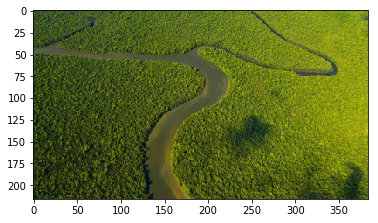

In [83]:
image1 = read_im("borneo_small.jpg")
show_im(image1)

In [84]:
patch1 = get_patch(20,20,10,image1) # Un patch non-bruité de taille 10*10 
dic1 = get_dic(image1,10,10)

In [85]:
w, cost = approximation(patch1, dic1, 0.001)

In [98]:
print("Test sur un dictionnaire issu d'une image non-bruitée avec un patch non-bruité")
print("\t Coût: ", cost)
print("\t La taille du vecteur de poids: ", w.shape)

Test sur un dictionnaire issu d'une image non-bruitée avec un patch non-bruité
	 Coût:  0.0010001357542605547
	 La taille du vecteur de poids:  (740,)


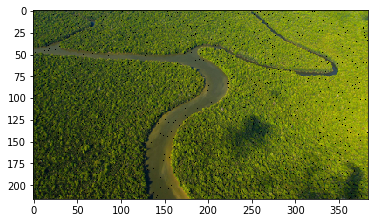

In [99]:
image2 = read_im("borneo_small.jpg")
image2_ = noise(image2, 0.01)
show_im(image2_)

In [105]:
patch2 = get_patch(20,20,10,image2) # Un patch non-bruité de taille 20*20 
dic2 = get_dic(image2_,10,10) # Un dictionnaire issu d'une image bruitée

In [106]:
w2, cost2 = approximation(patch2, dic2, 0.001)

In [107]:
print("Test sur un dictionnaire issu d'une image bruitée avec un patch non-bruité")
print("\t Coût: ", cost2)
print("\t La taille du vecteur de poids: ", w2.shape)

Test sur un dictionnaire issu d'une image bruitée avec un patch non-bruité
	 Coût:  0.001000060817983467
	 La taille du vecteur de poids:  (13,)


In [117]:
image3 = read_im("borneo_small.jpg") # Image non-bruitée
image3_ = noise(image3, 0.01)
tab_patches = get_all_patch_missing_value(image3_,10,10) # Tous les patchs bruités

patch3 = tab_patches[0] # Un patch bruité
dic3 = get_dic(image3,10,10) # Un dictionnaire issu d'une image non-bruitée

In [129]:
w3, cost3 = approximation(patch3, dic3, 0.001)

/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [130]:
print("Test sur un dictionnaire issu d'une image non-bruitée avec un patch bruité")
print("\t Coût: ", cost3)
print("\t La taille du vecteur de poids: ", w3.shape)

Test sur un dictionnaire issu d'une image non-bruitée avec un patch bruité
	 Coût:  12.283471471751982
	 La taille du vecteur de poids:  (740,)


In [137]:
image4 = noise(image3, 0.01)
patch4 = tab_patches[0]
dic4 = get_dic(image4,10,10)

In [138]:
w4, cost4 = approximation(patch3, dic3, 0.001)

/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [139]:
print("Test sur un dictionnaire issu d'une image bruitée avec un patch bruité")
print("\t Coût: ", cost4)
print("\t La taille du vecteur de poids: ", w4.shape)

Test sur un dictionnaire issu d'une image bruitée avec un patch bruité
	 Coût:  12.283471471751982
	 La taille du vecteur de poids:  (740,)


### Protocol expérimental sur les valeurs de alpha

In [144]:
def alpha_variation(patch, dic):
    alpha_ = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9]
    
    costs = []
    for a in alpha_:
        w, c = approximation(patch, dic, a)
        costs.append(c)
    
    plt.plot(alpha_, costs)
    plt.title("Le coût en fonction des valeurs de lambda")
    plt.show()

#### Test pour une image non-bruitée et un patch non-bruité

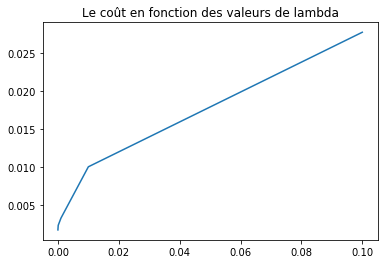

In [145]:
patch_1 = get_patch(20,20,10,image1) # Un patch non-bruité de taille
dic_1 = get_dic(image1,10,10) # Dictionnaire sur une image non-bruitée
alpha_variation(patch_1, dic_1)

#### Test pour une image bruitée et un patch non-bruité

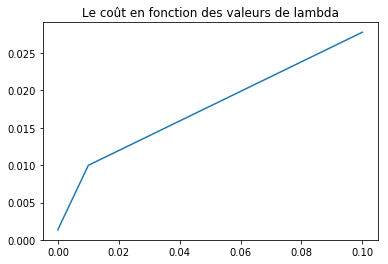

In [146]:
patch_2 = get_patch(20,20,10,image2) # Un patch non-bruité
dic_2 = get_dic(image2_,10,10) # Un dictionnaire issu d'une image bruitée
alpha_variation(patch_2, dic_2)

#### Test sur une image non-bruitée et un patch bruité

/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

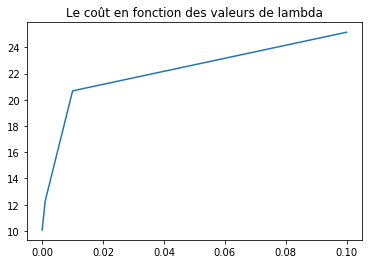

In [147]:
patch_3 = tab_patches[0] # Un patch bruité
dic_3 = get_dic(image3,10,10) # Un dictionnaire issu d'une image non-bruitée
alpha_variation(patch_3, dic_3)

#### Test avec une image bruitée et un patch bruité

/home/sabrina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


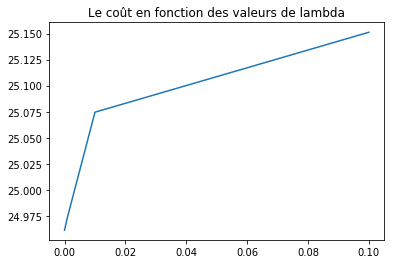

In [148]:
patch_4 = tab_patches[0]
dic_4 = get_dic(image4,10,10)
alpha_variation(patch_4, dic_4)

### Remplissage d'une image 

In [186]:
def dic_to_array(dic):
    array = list()
    for k1 in dic.keys():
        for k2 in dic[k1].keys():
            array.append(dic[k1][k2])
    return np.asarray(array)

In [188]:
print(dic_to_array(dic2).shape)

(13, 20, 20, 3)


In [189]:
print(len(w2))

13


In [198]:
def remplissage(image, h, alpha_):
    im = image.copy()
    i1 = h
    j1 = h
    while(i1 != im.shape[0]-h+1 and j1 != im.shape[1]-h+1):
        # A partir du coin supérieur gauche
        for j in range(j1, im.shape[1]-h+1):
            if((im[i1][j] == [-100, -100, -100]).all()):
                dic = get_dic(im,h,h)
                patch = get_patch(i1,j,h,im)
                w,c = approximation(patch, dic, alpha_)
                # Construction du résultat
                pixel = np.zeros(3)
                index_w = 0
                for k1 in dic.keys():
                    for k2 in dic[k1].keys():
                        pixel += np.array(dic[k1][k2][h][h])*w[index_w]
                    index_w += 1
                im[i1][j] = pixel
    return im

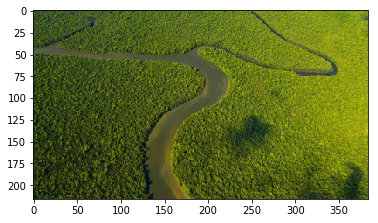

In [193]:
im = read_im("borneo_small.jpg")
show_im(im)

In [194]:
print(im.shape)

(216, 384, 3)


In [195]:
im_carre_manquant = delete_rect(im,100,100,10,10)

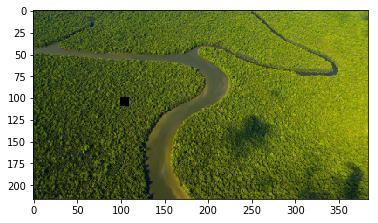

In [196]:
show_im(im_carre_manquant)

In [199]:
im_reconstruite = remplissage(im_carre_manquant,10,0.001)

KeyboardInterrupt: 